In [435]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
from matplotlib import pyplot as plt

from tqdm.auto import tqdm
tqdm.pandas()

from one.api import ONE
from brainbox.io.one import SessionLoader

import sys
sys.path.append('/home/crombie/code/ibl_photometry/src')
import iblphotometry.loaders as loaders
import iblphotometry.processing as proc
import iblphotometry.pipelines as pipe
import iblphotometry.metrics as metrics

from util import load_recinfo

In [2]:
cache_dir = '/home/crombie/mnt/ccu-iblserver/kb/data/one'
one = ONE(cache_dir=cache_dir)

In [24]:
df_recordings = load_recinfo()

In [ ]:
eid = df_recinfo['eid'][0]
loader = loaders.KceniaLoader(one)
photometry = loader.load_photometry_data(eid)

In [9]:
signal_raw = photometry['raw_calcium']['Region4G'].values
tpts = photometry['raw_calcium'].index.values

In [10]:
pipeline = [
        (
        proc.lowpass_bleachcorrect,
        dict(
            correction_method='subtract',
            filter_params=dict(N=3, Wn=0.01, btype='lowpass'),
            )
        )
]

photometry_proc = pipe.run_pipeline(pipeline, photometry['raw_calcium'])
signal_proc = photometry_proc['Region4G'].values

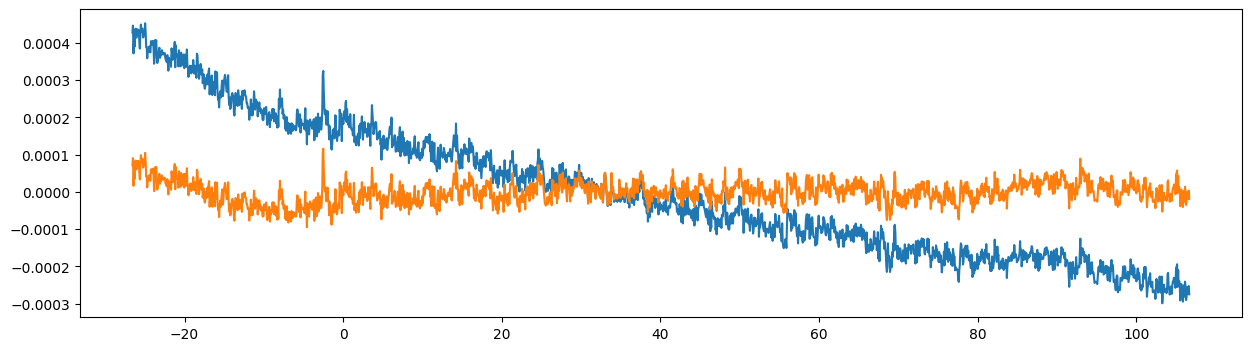

In [11]:
fig, ax = plt.subplots(figsize=(15, 4))

t_max = 2000

ax.plot(tpts[:t_max], signal_raw[:t_max] - signal_raw[:t_max].mean())
ax.plot(tpts[:t_max], signal_proc[:t_max])

In [12]:
import iblphotometry.metrics as metrics

In [13]:
metrics.low_freq_power_ratio(photometry_proc['Region4G'])

np.float64(0.7820230766847418)

In [14]:
metrics.spectral_entropy(photometry_proc['Region4G'])

np.float64(0.13827989728381007)

In [15]:
metrics.ar_score(photometry_proc['Region4G'])

np.float64(0.3638413328225682)

In [16]:
noise_sd = np.logspace(-2, 1)
scores = metrics.noise_simulation(photometry_proc['Region4G'], metrics.spectral_entropy, noise_sd)

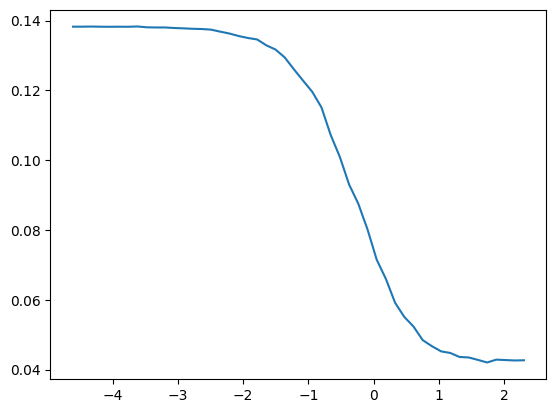

In [17]:
plt.plot(np.log(noise_sd), scores)

In [12]:
df_recordings

,eid,subject,date,n_rois,_acronyms,roi_ids,GC_label,acronyms,fiber_diameter_um,fiber_length_mm,numerical_aperture,targeted_regions,X-ml_um,Y-ap_um,Z-dv_um,depth,theta,phi,roll,expression
0,d2453284-c893-4a54-a5e7-f015854c727f,ZFM-03062,2021-08-27,1,['5HT?'],[0],TO_CHECK,[5HT?],[400.0],[5.0],[0.57],[MR],[nan],[-4360],[nan],[3900],[19.2],[0.0],[0],[1]
1,c2b953bd-e24e-410a-be4e-b3dd6ef373b8,ZFM-03062,2021-08-30,1,['5HT?'],[0],TO_CHECK,[5HT?],[400.0],[5.0],[0.57],[MR],[nan],[-4360],[nan],[3900],[19.2],[0.0],[0],[1]
2,b7b186ee-1b36-4b1a-ae15-70078c472f97,ZFM-03062,2021-08-31,1,['5HT?'],[0],TO_CHECK,[5HT?],[400.0],[5.0],[0.57],[MR],[nan],[-4360],[nan],[3900],[19.2],[0.0],[0],[1]
3,a4d68a06-ffc3-43f3-ae1d-f4d05124ed22,ZFM-03062,2021-09-02,1,['5HT?'],[0],TO_CHECK,[5HT?],[400.0],[5.0],[0.57],[MR],[nan],[-4360],[nan],[3900],[19.2],[0.0],[0],[1]
4,3f4e6cd3-e402-4de5-84c8-f0ebb9a93fe8,ZFM-03062,2021-09-03,1,['5HT?'],[0],TO_CHECK,[5HT?],[400.0],[5.0],[0.57],[MR],[nan],[-4360],[nan],[3900],[19.2],[0.0],[0],[1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,a1ccc8ed-9829-4af8-91fd-cc1c83b74b98,ZFM-04022,2022-12-30,2,"['VTA', 'SNc']","[0, 1]",TO_CHECK,"[VTA, SNc]","[200.0, 200.0]","[5.0, 5.0]","[0.48, 0.48]","[VTA, SNc]","[-500.0, 1350.0]","[-3100, -3120]","[0.0, 0.0]","[4200, 4100]","[0.0, 0.0]","[nan, nan]","[0, 0]","[1, 1]"
691,537a8269-3cdb-4738-9b0f-1134cd4e3d0d,ZFM-04022,2023-01-10,2,"['VTA', 'SNc']","[0, 1]",PASS,"[VTA, SNc]","[200.0, 200.0]","[5.0, 5.0]","[0.48, 0.48]","[VTA, SNc]","[-500.0, 1350.0]","[-3100, -3120]","[0.0, 0.0]","[4200, 4100]","[0.0, 0.0]","[nan, nan]","[0, 0]","[1, 1]"
692,67231166-8980-4146-ad6d-3d7bee327ccf,ZFM-04022,2023-01-12,2,"['VTA', 'SNc']","[0, 1]",PASS,"[VTA, SNc]","[200.0, 200.0]","[5.0, 5.0]","[0.48, 0.48]","[VTA, SNc]","[-500.0, 1350.0]","[-3100, -3120]","[0.0, 0.0]","[4200, 4100]","[0.0, 0.0]","[nan, nan]","[0, 0]","[1, 1]"
693,2b051f03-6723-476f-b8e6-f309a119dde7,ZFM-04022,2023-07-03,1,"['VTA', 'SNc']",[0],TO_CHECK,"[VTA, SNc]","[200.0, 200.0]","[5.0, 5.0]","[0.48, 0.48]","[VTA, SNc]","[-500.0, 1350.0]","[-3100, -3120]","[0.0, 0.0]","[4200, 4100]","[0.0, 0.0]","[nan, nan]","[0, 0]","[1, 1]"


In [25]:
def _load_calcium(series, loader):
    try:
        photometry = loader.load_photometry_data(series['eid'])
    except ValueError:
        return
    return photometry['raw_calcium']

def _load_isosbestic(series, loader):
    try:
        photometry = loader.load_photometry_data(series['eid'])
    except ValueError:
        return
    return photometry['raw_isosbestic']

In [31]:
loader = loaders.KceniaLoader(one)
df_recordings['photometry_ca'] = df_recordings.progress_apply(lambda x: _load_calcium(x, loader), axis='columns')

  0%|          | 0/695 [00:00<?, ?it/s]

In [79]:
df_recordings.to_pickle('recordings.pkl')

In [47]:
df_recordings = df_recordings.dropna(subset='photometry_ca')

In [170]:
preprocessing_pipeline = [
    (proc.remove_spikes, dict(sd=5)),
    (proc.lowpass_bleachcorrect, dict(correction_method='subtract', filter_params=dict(N=3, Wn=0.01, btype='lowpass')))
]

metrics_dict = {
    'n_unique_samples': [],
    'n_spikes': [],
    'signal_asymmetry': preprocessing_pipeline,
    'percentile_dist': preprocessing_pipeline,
    'low_freq_power_ratio': preprocessing_pipeline,
    'spectral_entropy': preprocessing_pipeline,
    'ar_score': preprocessing_pipeline,
    'response_variability_ratio': preprocessing_pipeline,
    'response_magnitude': preprocessing_pipeline
}
    

In [171]:
df_recordings = df_recordings.drop('n_unique_samples', axis=1)

In [355]:
for metric, pipeline in metrics_dict.items():
    print(metric)
    metric_func = getattr(metrics, metric)
    metric_vals = []
    for idx, row in tqdm(df_recordings.iterrows(), total=len(df_recordings)):
        # loader = loaders.KceniaLoader(one)
        # photometry = loader.load_photometry_data(row['eid'])
        photometry_proc = pipe.run_pipeline(pipeline, row['photometry_ca'])
        if metric in ['response_variability_ratio', 'response_magnitude']:
            trials = one.load_dataset(row['eid'], '*trials.table')
            events = trials.query('feedbackType == 1')['feedback_times']
            metric_val = metric_func(photometry_proc.iloc[:, 0], events)
        else:
            metric_val = metric_func(photometry_proc.iloc[:, 0])
        metric_vals.append(metric_val)
    df_recordings[metric] = metric_vals

n_unique_samples


  0%|          | 0/694 [00:00<?, ?it/s]

n_spikes


  0%|          | 0/694 [00:00<?, ?it/s]

/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:47: RuntimeWarning: invalid value encountered in divide
  return (A - np.average(A)) / np.std(A)


signal_asymmetry


  0%|          | 0/694 [00:00<?, ?it/s]

/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:630: UserWarning: KDE fillnan failed, using global median
  warnings.warn('KDE fillnan failed, using global median')  # TODO logger
/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:627: UserWarning: all values NaN, setting to zeros
  warnings.warn('all values NaN, setting to zeros')  # TODO logger
/home/crombie/code/ibl_photometry/src/iblphotometry/metrics.py:52: RuntimeWarning: invalid value encountered in scalar divide
  return a / b


percentile_dist


  0%|          | 0/694 [00:00<?, ?it/s]

low_freq_power_ratio


  0%|          | 0/694 [00:00<?, ?it/s]

/home/crombie/code/ibl_photometry/src/iblphotometry/metrics.py:235: RuntimeWarning: invalid value encountered in scalar divide
  return psd[freqs <= f_cutoff].sum() / psd.sum()


spectral_entropy


  0%|          | 0/694 [00:00<?, ?it/s]

/home/crombie/code/ibl_photometry/src/iblphotometry/metrics.py:257: RuntimeWarning: invalid value encountered in divide
  psd_norm = psd / np.sum(psd)


ar_score


  0%|          | 0/694 [00:00<?, ?it/s]

response_variability_ratio


  0%|          | 0/694 [00:00<?, ?it/s]

/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:630: UserWarning: KDE fillnan failed, using global median
  warnings.warn('KDE fillnan failed, using global median')  # TODO logger
/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:627: UserWarning: all values NaN, setting to zeros
  warnings.warn('all values NaN, setting to zeros')  # TODO logger
/home/crombie/code/ibl_photometry/src/iblphotometry/metrics.py:197: RuntimeWarning: invalid value encountered in scalar divide
  return (responses).mean(axis=0).var() / (responses).var(axis=0).mean()
/home/crombie/code/ibl_photometry/src/iblphotometry/metrics.py:197: RuntimeWarning: invalid value encountered in scalar divide
  return (responses).mean(axis=0).var() / (responses).var(axis=0).mean()
/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:627: UserWarning: all values NaN, setting to zeros
  warnings.warn('all values NaN, setting to zeros')  # TODO logger
/home/crombie/code/ibl_photometry/

response_magnitude


  0%|          | 0/694 [00:00<?, ?it/s]

/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:630: UserWarning: KDE fillnan failed, using global median
  warnings.warn('KDE fillnan failed, using global median')  # TODO logger
/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:627: UserWarning: all values NaN, setting to zeros
  warnings.warn('all values NaN, setting to zeros')  # TODO logger
/home/crombie/code/ibl_photometry/src/iblphotometry/processing.py:627: UserWarning: all values NaN, setting to zeros
  warnings.warn('all values NaN, setting to zeros')  # TODO logger


In [383]:
# 3 entries are waaaaay out of expected range
df_recordings.loc[df_recordings['response_magnitude'] > 100, 'response_magnitude'] = np.nan

# Move relevant columns to smaller df and drop rows with any NaN values
cols = list(metrics_dict.keys()) + ['subject', 'date', 'targeted_regions', 'fiber_diameter_um']
df_metrics = df_recordings[cols].dropna()
print(len(df_recordings), len(df_metrics))

694 686


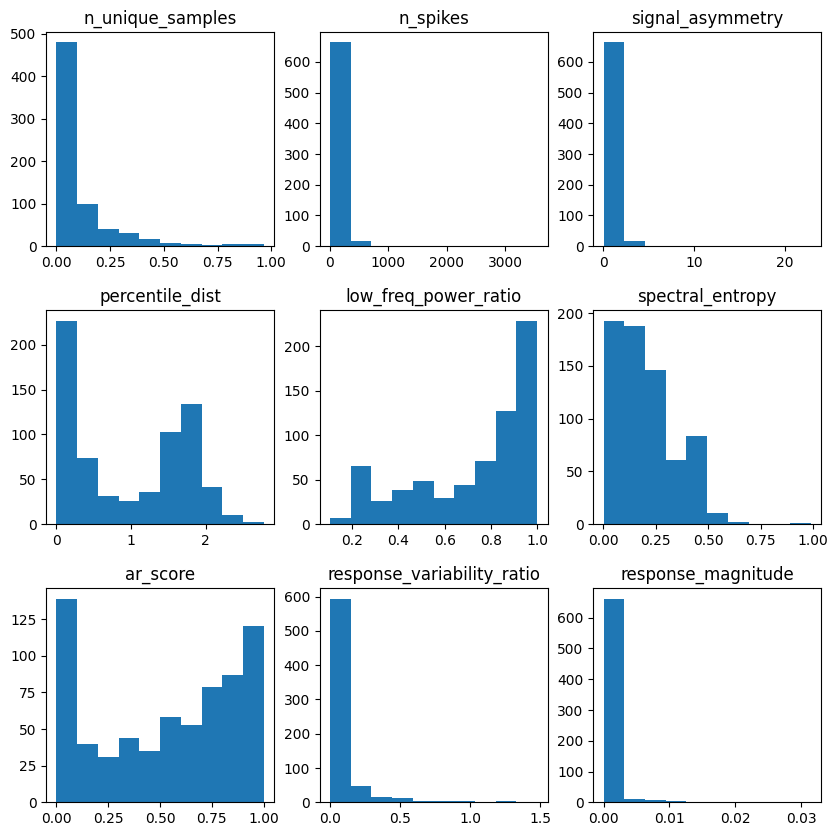

In [384]:
n_metrics = len(metrics_dict.keys())
fig, axs = plt.subplots(int(np.ceil(n_metrics / 3)), 3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)
for ax, (metric_name, metric_values) in zip(axs.ravel(), df_metrics[metrics_dict.keys()].items()):
    ax.hist(metric_values)
    ax.set_title(metric_name)
    

In [336]:
df_recordings['reward_times'] = df_recordings['eid'].progress_apply(lambda x: one.load_dataset(x, '*trials.table').query('feedbackType == 1')['feedback_times'].values)

  0%|          | 0/694 [00:00<?, ?it/s]

In [408]:
df_recordings['cue_times'] = df_recordings['eid'].progress_apply(lambda x: one.load_dataset(x, '*trials.table')['goCue_times'].values)

  0%|          | 0/694 [00:00<?, ?it/s]

In [409]:
df_recordings['movement_times'] = df_recordings['eid'].progress_apply(lambda x: one.load_dataset(x, '*trials.table')['firstMovement_times'].values)

  0%|          | 0/694 [00:00<?, ?it/s]

In [371]:
def psth(A, events, window=(0, 1)):
    signal = A.values.squeeze()
    assert signal.ndim == 1
    tpts = A.index.values
    dt = np.median(np.diff(tpts))
    events = events[events + window[1] < tpts.max()]
    event_inds = tpts.searchsorted(events)
    i0s = event_inds - int(window[0] / dt)
    i1s = event_inds + int(window[1] / dt)
    responses = np.row_stack([signal[i0:i1] for i0, i1 in zip(i0s, i1s)])
    responses = (responses.T - signal[event_inds]).T
    tpts = np.arange(window[0], window[1] - dt, dt)
    return responses, tpts

In [592]:
def plot_qc_example(df_recordings, sample, metric, event, percentile_range):
    t0, t1 = np.nanpercentile(df_recordings[metric], percentile_range)
    fig = plt.figure(figsize=(12, 6))
    
    ax_metric = fig.add_axes([0.1, 0.6, 0.35, 0.45])  # [left, bottom, width, height]
    ax_metric.hist(df_recordings[metric], histtype='step', lw=2, color='black')
    ax_metric.axvline(t0, ls='--', color='red')
    ax_metric.axvline(t1, ls='--', color='red')
    ax_metric.set_title(metric)
    ax_metric.set_ylabel('Recordings')
    percentiles = [np.searchsorted(df_recordings[metric], sample[metric]) / len(df_recordings) for metric in metrics_dict.keys()]
    p_string = '\n'.join([f'{m}: {p:.2f}\n' for m, p in zip(metrics_dict.keys(), percentiles) if m != metric])
    ax_metric.text(0.55, 0.6, p_string, fontsize=8, linespacing=0.5, transform=ax_metric.transAxes)
        
    ax_psth = fig.add_axes([0.55, 0.6, 0.35, 0.45])  # [left, bottom, width, height]
    responses, tpts = psth(sample['photometry_ca'].iloc[:, 0], sample[f'{event}_times'])
    ax_psth.plot(tpts, responses.mean(axis=0), color='C0')
    ax_psth.plot(tpts, responses.mean(axis=0) - stats.sem(responses, axis=0), ls='--', color='C0')
    ax_psth.plot(tpts, responses.mean(axis=0) + stats.sem(responses, axis=0), ls='--', color='C0')
    ax_psth.set_title(f"Target: {sample['targeted_regions'][0]}, Event: {event}")
    ax_psth.set_ylabel('Response (a.u.)')
    ax_psth.set_xlabel('Time (s)')
    
    ax_signal = fig.add_axes([0.1, 0.1, 0.8, 0.4])  # [left, bottom, width, height]
    
    tpts = sample['photometry_ca'].index.values
    signal = sample['photometry_ca'].iloc[:, 0]
    ax_signal.plot(tpts, proc.z(signal), alpha=0.5, label='Raw')
    if metrics_dict[metric]:
        photometry_proc = pipe.run_pipeline(metrics_dict[metric], sample['photometry_ca'])
        processed = photometry_proc.iloc[:, 0]
        ax_signal.plot(tpts, proc.z(processed), alpha=0.5, label='Processed')
    ax_signal.set_xlim([0, tpts.max()])
    ax_signal.set_xlabel('Time (s)')
    ax_signal.set_ylim([np.percentile(proc.z(signal), 1) - 1, np.percentile(proc.z(signal), 99) + 5])
    ax_signal.set_ylabel('Signal (z-score)')
    ax_signal.legend(loc=1)
    return fig, ax

In [595]:
# Pick a metric
metric = 'n_unique_samples'

# Sample from a range in the distirbution
percentile_range = [90, 100]
t0, t1 = np.nanpercentile(df_recordings[metric], percentile_range)
samples = df_recordings[(df_recordings[metric] >= t0) & (df_recordings[metric] <= t1)]
sample = samples.sample().squeeze()

/tmp/ipykernel_51833/1018734216.py:10: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  responses = np.row_stack([signal[i0:i1] for i0, i1 in zip(i0s, i1s)])


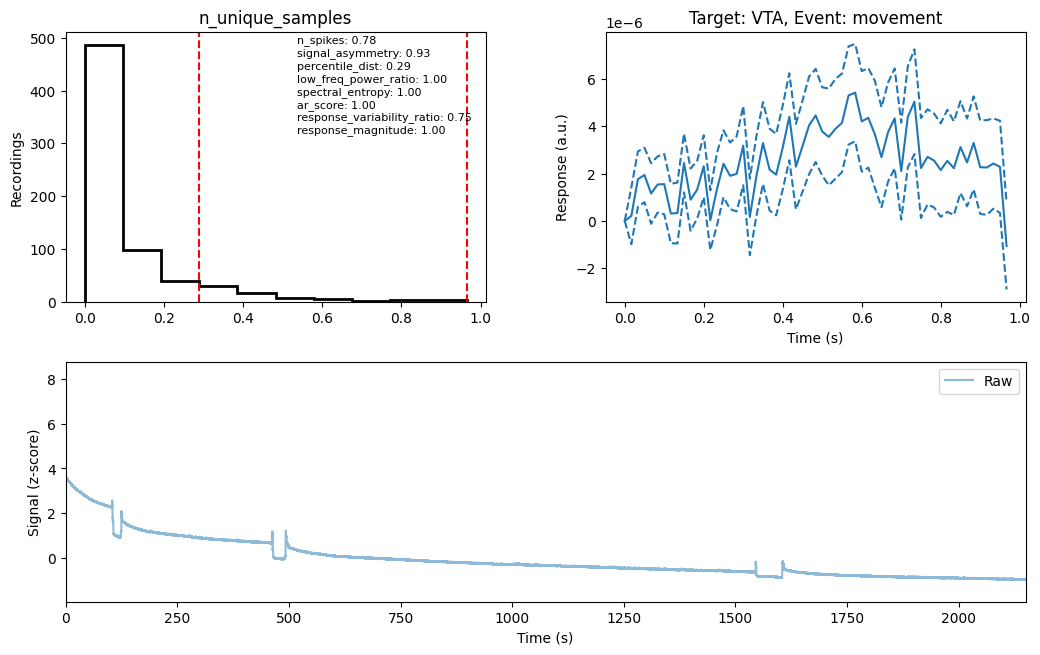

In [594]:
# Pick an event
event = 'movement'  # 'reward', 'cue', 'movement'
fig, ax = plot_qc_example(df_recordings, sample, metric, event, percentile_range) 

/tmp/ipykernel_51833/2146159928.py:7: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(freqs), np.log10(psd))


Text(0, 0.5, 'log(power)')

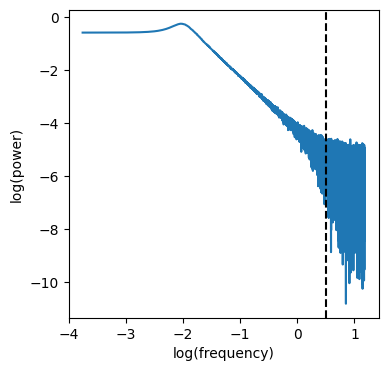

In [537]:
dt = np.median(np.diff(tpts))
n_pts = len(processed)
freqs = np.fft.rfftfreq(n_pts, dt)
psd = np.abs(np.fft.rfft(processed - processed.mean())) ** 2

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(np.log10(freqs), np.log10(psd))
ax.axvline(np.log10(3.18), ls='--', color='black')
ax.set_xlabel('log(frequency)')
ax.set_ylabel('log(power)')

Text(0, 0.5, 'Samples')

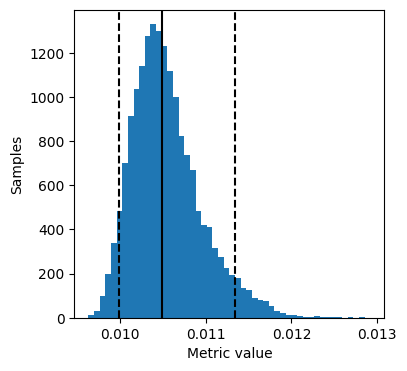

In [530]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.hist(signal.values, bins=50)
ax.axvline(np.percentile(signal.values, 50), color='black')
ax.axvline(np.percentile(signal.values, 5), ls='--', color='black')
ax.axvline(np.percentile(signal.values, 95), ls='--', color='black')
ax.set_xlabel('Metric value')
ax.set_ylabel('Samples')

In [550]:
df_metrics['target'] = df_metrics['targeted_regions'].apply(lambda x: x[0] if len(x) > 0 else np.nan)

In [551]:
df_metrics['target'].unique()

array(['DR', 'MR', 'VTA', 'SNc', 'LC', nan, 'NBM'], dtype=object)

Text(0.8, 0.9, 'Kruskal-Wallis: 6.24e+01\np=3.89e-12')

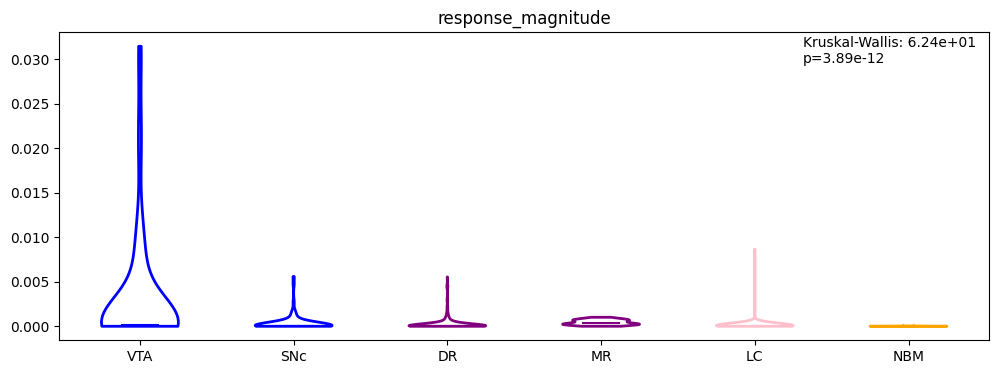

In [588]:
metric = 'response_magnitude'
target_order = {'VTA': 1, 'SNc': 2, 'DR': 3, 'MR': 4, 'LC': 5, 'NBM': 6}
target_colors = {'VTA': 'blue', 'SNc': 'blue', 'DR': 'purple', 'MR': 'purple', 'LC': 'pink', 'NBM': 'orange'}
    
fig, ax = plt.subplots(figsize=(12, 4))
for target, group in df_metrics.groupby('target'):
    violin_parts = ax.violinplot([group[metric]], positions=[target_order[target]], showextrema=False, showmedians=True)
    for pc in violin_parts['bodies']:
        pc.set_facecolor('none')
        pc.set_edgecolor(target_colors[target])
        pc.set_linewidth(2)
        pc.set_alpha(1)
        violin_parts['cmedians'].set_color(target_colors[target])
ax.set_xticks(np.arange(len(target_order)) + 1)
ax.set_xticklabels(target_order.keys())
ax.set_title(metric)

# Extract values for each group as lists
group_values = [group.tolist() for _, group in df_metrics.groupby('target')[metric]]
# Perform Kruskal-Wallis test
stat, p_value = stats.kruskal(*group_values)

ax.text(0.8, 0.9, f'Kruskal-Wallis: {stat:.2e}\np={p_value:.2e}', transform=ax.transAxes)

# df_metrics[metric]

In [560]:
group[metric].isna().any()

np.False_

[Text(0, 0, 'n_unique_samples'),
 Text(0, 1, 'n_spikes'),
 Text(0, 2, 'signal_asymmetry'),
 Text(0, 3, 'percentile_dist'),
 Text(0, 4, 'low_freq_power_ratio'),
 Text(0, 5, 'spectral_entropy'),
 Text(0, 6, 'ar_score'),
 Text(0, 7, 'response_variability_ratio'),
 Text(0, 8, 'response_magnitude')]

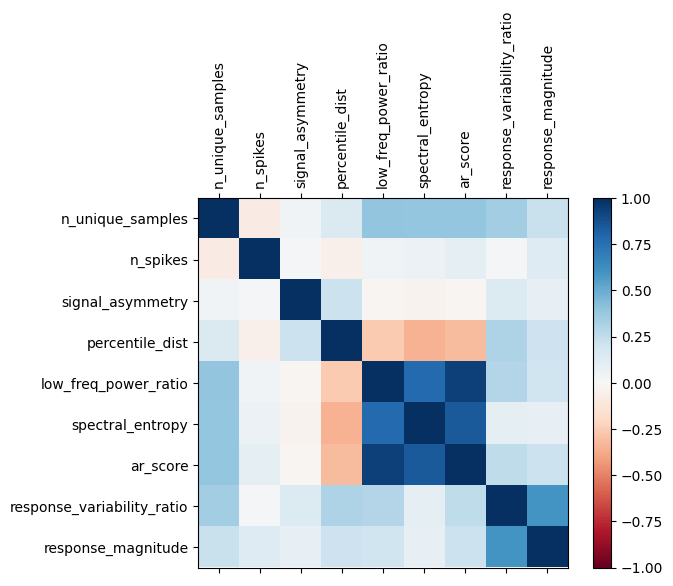

In [359]:
fig, ax = plt.subplots()

corr_mat = np.corrcoef(df_metrics[metrics_dict.keys()].values.T)
mat = ax.matshow(corr_mat, vmin=-1, vmax=1, cmap='RdBu')
plt.colorbar(mat)
ax.set_xticks(np.arange(len(metrics_dict.keys())))
ax.set_xticklabels(metrics_dict.keys())
ax.tick_params(axis='x', rotation=90)
ax.set_yticks(np.arange(len(metrics_dict.keys())))
ax.set_yticklabels(metrics_dict.keys())


In [401]:
df_metrics = df_metrics.sort_values(['subject', 'date'])

In [402]:
# Convert date column to datetime and compute 'recording_day'
df_metrics['date'] = pd.to_datetime(df_metrics['date'])  # Ensure 'date' column is datetime

def _get_recording_days(group):
    group = group.copy()  # avoid SettingWithCopyWarning
    # group['recording_day'] = (group['date'] - group['date'].iloc[0])
    group['recording_day'] = np.arange(len(group))
    return group

df_metrics = df_metrics.groupby('subject', group_keys=False).apply(_get_recording_days)
# df_metrics['recording_day'] = df_metrics['recording_day'].apply(lambda x: x.days)

/tmp/ipykernel_51833/315210523.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_metrics = df_metrics.groupby('subject', group_keys=False).apply(_get_recording_days)


In [403]:
# Max days to look into the future
day_max = 21

# Initialize lists to hold results
index = []
data = {'rsquared': [], 'pvalue': [], 'slope': []}

# Loop over metrics
for metric in metrics_dict.keys():
    # Loop over days offset
    for day in range(1, day_max):
        # Filter the data to get values at day 0 and day
        df_day0 = df_metrics[df_metrics['recording_day'] == 0]
        df_day = df_metrics[df_metrics['recording_day'] == day]
        # Merge the data, ensuring paired samples for each subject
        merged = pd.merge(df_day0[['subject', metric]], df_day[['subject', metric]], on='subject', suffixes=('_0', f'_{day}'))
        # Linear regression
        if len(merged) < 3:
            continue
        res = stats.linregress(merged[f'{metric}_0'], merged[f'{metric}_{day}'])
        # Append results
        index.append((metric, day))
        data['rsquared'].append(res.rvalue ** 2)
        data['pvalue'].append(res.pvalue)
        data['slope'].append(res.slope)

# Create the DataFrame
multi_index = pd.MultiIndex.from_tuples(index, names=["metric", "day"])
df_pred = pd.DataFrame(data, index=multi_index)

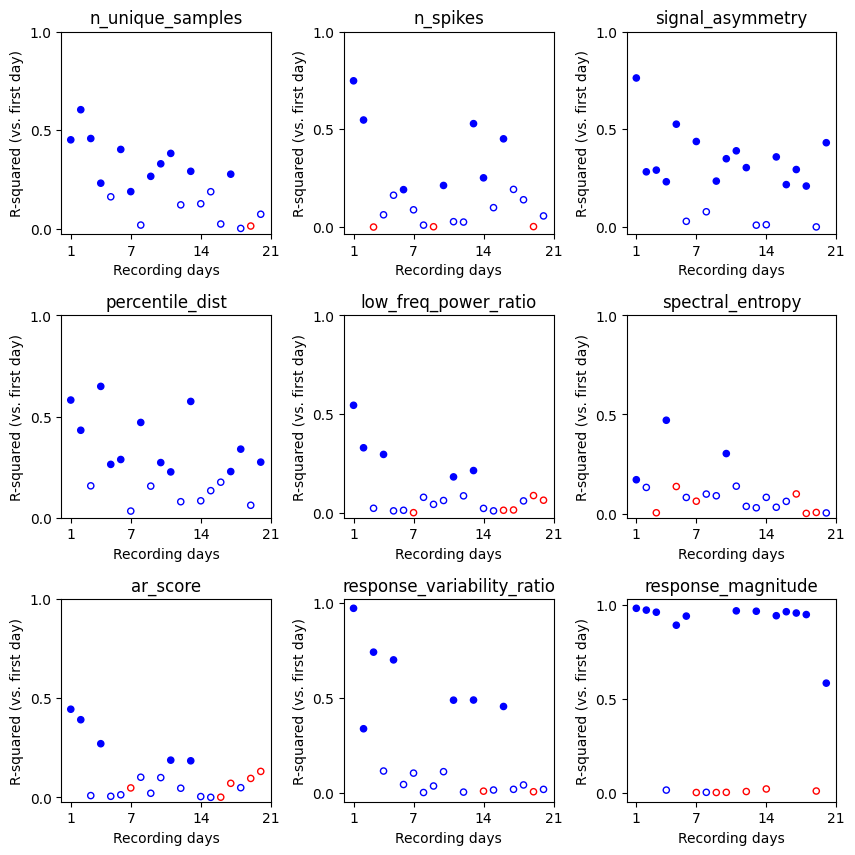

In [404]:
n_metrics = len(metrics_dict.keys())
fig, axs = plt.subplots(int(np.ceil(n_metrics / 3)), 3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.35)

for ax, (metric, values) in zip(axs.ravel(), df_pred.groupby('metric', sort=False)):
    values = values.droplevel('metric').reset_index('day')
    ec = ['blue' if s > 0 else 'red' for s in values['slope']]
    fc = [c if p <= 0.05 else 'none' for c, p in zip(ec, values['pvalue'])]
    ax.scatter(values['day'], values['rsquared'], s=20, ec=ec, fc=fc)
    ax.set_title(metric)
    ax.set_xticks([1, 7, 14, 21])
    ax.set_xlabel('Recording days')
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylabel('R-squared (vs. first day)')